# Neural Networks II

Vamos a construir una red neuronal para clasificar ejemplos de un dataset sintético. El dataset consiste en 2 clases de puntos en el plano, separados por una curva no lineal. La idea es que la red neuronal aprenda a clasificar los puntos en base a su posición en el plano.

Comenzamos creando el dataset:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

[[7.39606652 5.13786678]
 [3.05431491 3.79036211]
 [6.9893056  4.13593119]
 [8.68584286 5.87399293]
 [3.1011456  4.90904991]]
[0 0 0 0 0]


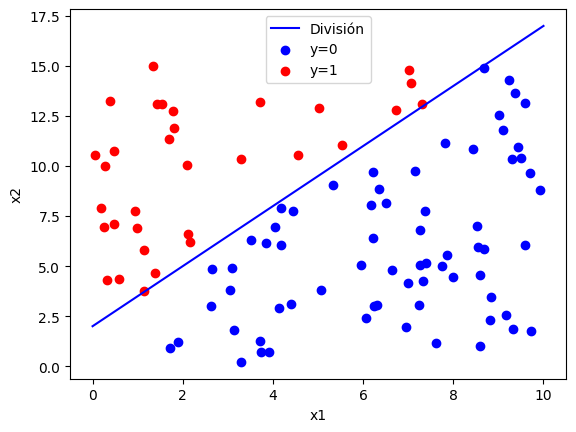

In [9]:
def division(x):
    return 1.5*x + 2

# Generar línea
line_x = np.linspace(0, 10, 100)
line_y = division(line_x)

# Generar 100 datos aleatorios
data_x1 = 10 * np.random.random(100)
data_x2 = 15 * np.random.random(100)
X = np.array([data_x1, data_x2]).T

# Print 5 first rows
print(X[:5])

# Build labels, if x1 > x2 then y = 1, else y = 0
Y = np.where(data_x2 > division(data_x1), 1, 0)
# Convert y to numpy 
Y = np.array(Y)

# Print 5 first rows
print(Y[:5])


# Visualizar datos
plt.plot(line_x, line_y, 'b-')

# Plot the data, blue for y=0, red for y=1
plt.scatter(data_x1[Y==0], data_x2[Y==0], c='blue')
plt.scatter(data_x1[Y==1], data_x2[Y==1], c='red')

# Add legend
plt.legend(['División', 'y=0', 'y=1'])
# Add axis labels
plt.xlabel('x1')
plt.ylabel('x2')

plt.show()


## Red Neuronal con Keras

Nuestro dataset consiste en 2 clases de puntos en el plano, separados por recta. La idea es que la red neuronal aprenda a clasificar los puntos en base a su posición en el plano.

Vamos a utilizar una red neuronal como la de la teoría, con dos capas ocultas de 3 neuronas cada una. La función de activación de las neuronas de todas las capas será la función sigmoide.

In [2]:
input_size = 2
hidden_size = 3
output_size = 1

In [3]:
from keras.models import Sequential
from keras.layers import Dense

Construimos la red neuronal con Keras:

In [10]:
# Create a Sequential model
model = Sequential()

# Add the first hidden layer with 3 neurons and input size 2
model.add(Dense(hidden_size, input_dim=input_size, activation='sigmoid'))

# Add the second hidden layer with 3 neurons
model.add(Dense(hidden_size, activation='sigmoid'))

# Add the output layer with 1 neuron
model.add(Dense(output_size, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Summary of the model architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 3)                 9         
                                                                 
 dense_4 (Dense)             (None, 3)                 12        
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 25 (100.00 Byte)
Trainable params: 25 (100.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Tenemos 25 parametros a estimar, 18 de los pesos, y 7 de los bias:
- Pesos: 2x3 + 3x3 + 3x1 = 18
- Bias: 3 + 3 + 1 = 7

Entrenamos la red:

In [11]:
# Train the neural network
model.fit(X, Y, epochs=10, batch_size=10, verbose=1)

Epoch 1/10
10/10 [==============================] - 0s 1ms/step - loss: 0.6446 - accuracy: 0.6800
Epoch 2/10
10/10 [==============================] - 0s 1ms/step - loss: 0.6408 - accuracy: 0.6800
Epoch 3/10
10/10 [==============================] - 0s 1ms/step - loss: 0.6370 - accuracy: 0.6800
Epoch 4/10
10/10 [==============================] - 0s 1ms/step - loss: 0.6336 - accuracy: 0.6800
Epoch 5/10
10/10 [==============================] - 0s 1ms/step - loss: 0.6298 - accuracy: 0.6800
Epoch 6/10
10/10 [==============================] - 0s 1ms/step - loss: 0.6271 - accuracy: 0.6800
Epoch 7/10
10/10 [==============================] - 0s 1ms/step - loss: 0.6242 - accuracy: 0.6800
Epoch 8/10
10/10 [==============================] - 0s 2ms/step - loss: 0.6217 - accuracy: 0.6800
Epoch 9/10
10/10 [==============================] - 0s 2ms/step - loss: 0.6188 - accuracy: 0.6800
Epoch 10/10
10/10 [==============================] - 0s 1ms/step - loss: 0.6164 - accuracy: 0.6800


Y evaluamos el resultado:

In [12]:
# Evaluate the model
loss, accuracy = model.evaluate(X, Y, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

# Predict some data and display
print('\nPrediction:')
print(model.predict(X[:5]).T)

print('\nLabels:')
print(Y[:5])


Accuracy: 68.00

Prediction:
1/1 [==============================] - 0s 39ms/step
[[0.39812377 0.40821722 0.39851698 0.39781037 0.41104862]]

Labels:
[0 0 0 0 0]


Otro modo de entrenamiento en el que guardamos el historial de la función de coste:

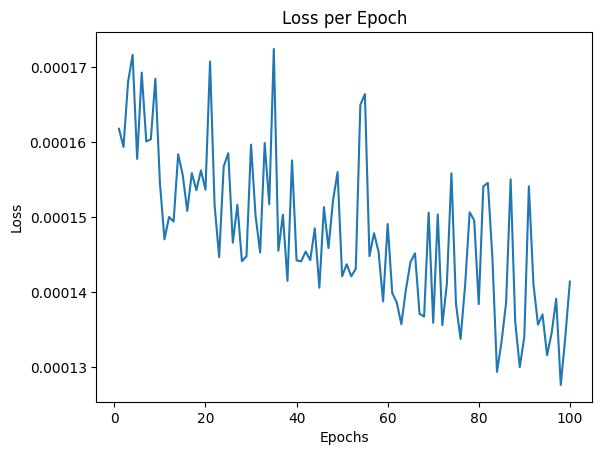

In [16]:
# Store loss values during training
loss_history = []

# Training the model and recording the loss
epochs = 100
batch_size = 10
for epoch in range(epochs):
    history = model.fit(X, Y, epochs=1, batch_size=batch_size, verbose=0)
    loss_history.append(history.history['loss'][0])

# Plot the loss per epoch
plt.plot(range(1, epochs + 1), loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.show()

## Red Neuronal con PyTorch

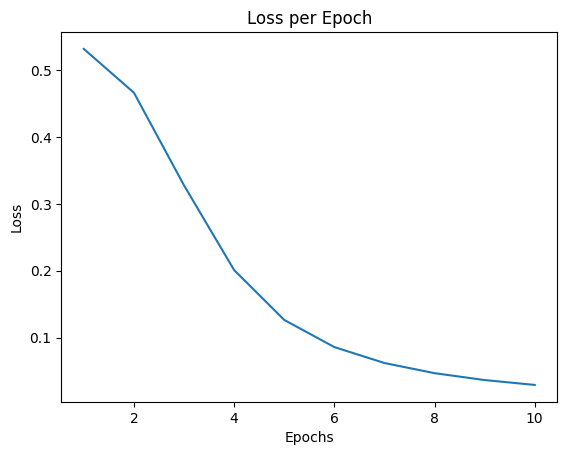

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

# Define the neural network model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(2, 3)  # Input size: 2, Hidden layer size: 3
        self.fc2 = nn.Linear(3, 3)  # Hidden layer size: 3
        self.fc3 = nn.Linear(3, 1)  # Output size: 1
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.sigmoid(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# Create an instance of the model
model = NeuralNetwork()

# Define the loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy loss
optimizer = optim.Adam(model.parameters(), lr=0.01)




# Training data (X and y should be prepared in advance)
X_tensor = torch.tensor(X, dtype=torch.float32)
Y_tmp = [[i] for i in Y]
#[[0] [1] [1] [0]]
Y_tensor = torch.tensor(Y_tmp, dtype=torch.float32)




# Store loss values during training
loss_history = []

# Training the model and recording the loss
epochs = 10
batch_size = 1
for epoch in range(epochs):
    for i in range(0, len(X), batch_size):
        inputs = X_tensor[i:i+batch_size]
        labels = Y_tensor[i:i+batch_size]

        optimizer.zero_grad()
        outputs = model(inputs)

        loss = criterion(outputs, labels)

        loss.backward()
        
        optimizer.step()

    loss_history.append(loss.item())

# Plot the loss per epoch
plt.plot(range(1, epochs + 1), loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.show()


# MNIST Dataset con Capas Densas

## MNIST Dataset con Keras

In [13]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical

Hay varias formas de disponer del dataset MNIST, en este caso lo vamos a cargar desde Keras.

In [14]:
# Load the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

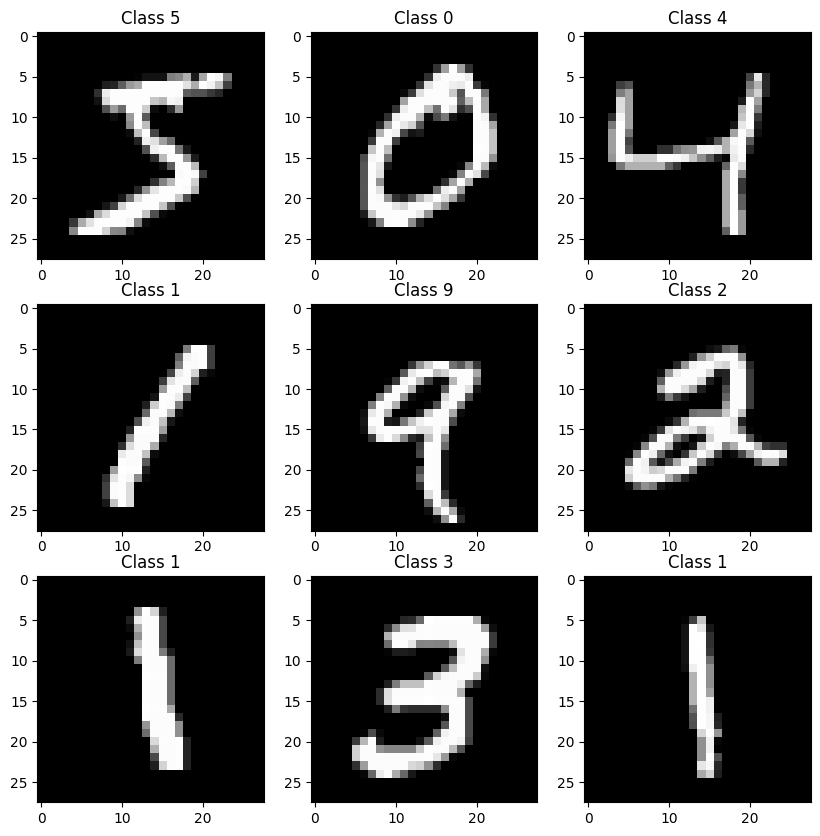

In [15]:
# Visualize some examples from the dataset
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title('Class {}'.format(y_train[i]))
plt.show()

Class: 5
Shape: (28, 28)

Pixels:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253

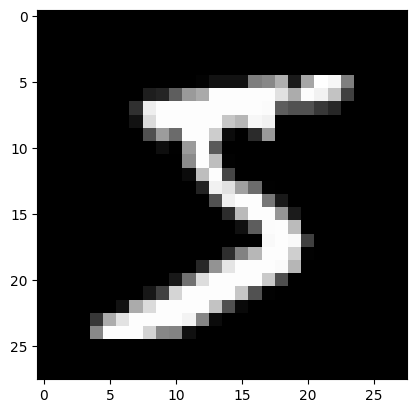

In [16]:
# For the first example, show the image, the label, the pixel values, and the shape
print('Class: {}'.format(y_train[0]))
print('Shape: {}'.format(X_train[0].shape))

# Display the image
plt.imshow(X_train[0], cmap='gray')

# Print X_train[0] without wrapping the lines
np.set_printoptions(linewidth=np.inf)
print('\nPixels:\n', X_train[0])


A continuación preprocesaremos los datos, normalizando los valores de los píxeles y convirtiendo las etiquetas a formato one-hot encoded.

Para lo primero, dado que la intensidad de cada pixel está en el rango [0, 255], dividimos cada pixel por 255 para que los valores estén en el rango [0, 1].

Para lo segundo, dado que tenemos 10 clases [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], convertimos cada etiqueta en un vector de 10 elementos, con un 1 en la posición correspondiente a la clase y 0 en el resto.

In [17]:
# Normalize pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [18]:
# Convert labels to one-hot encoded format
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Visualizamos el primer elemento del dataset una vez normalizado:

In [19]:
print('\nPixels:\n', X_train[0])
print('\nLabel:\n', y_train[0])


Pixels:
 [[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         

A continuación construimos el modelo que usaremos resolver el problema.

Nuestro objetivo es, dada una imagen de entrada, predecir la clase a la que pertenece. Por tanto, la capa de salida tendrá 10 neuronas, una por cada clase, y la función de activación será la función softmax.

Recordamos que la función softmax es una generalización de la función sigmoide para el caso de más de dos clases. La función softmax transforma un vector de números reales en un vector de la misma longitud, donde cada elemento está en el rango [0, 1] y la suma de todos los elementos es 1. El valor de cada elemento representa la probabilidad de que la entrada pertenezca a la clase correspondiente. La función tiene la siguiente forma:

$$\sigma(\mathbf{z})_j = \frac{e^{z_j}}{\sum_{k=1}^K e^{z_k}}$$

En cuanto a la capa intermedia, usaremos la función ReLU, ya que suele dar buenos resultados en este tipo de problemas.

In [20]:
model = Sequential()

# Flatten the 28x28 input images to a 1D array (784 elements)
model.add(Flatten(input_shape=(28, 28)))

# Add a hidden layer with 128 neurons and ReLU activation
model.add(Dense(128, activation='relu'))

# Add an output layer with 10 neurons (one for each digit) and softmax activation
model.add(Dense(10, activation='softmax'))


Tras definir el modelo en Keras, lo compilamos, especificando la función de coste, el optimizador y las métricas que queremos usar durante el entrenamiento:
- Función de coste: categorical_crossentropy, ya que estamos ante un problema de clasificación multiclase.
- Optimizador: Adam, un optimizador que suele dar buenos resultados en este tipo de problemas.
- Métricas: accuracy, para ver la precisión del modelo durante el entrenamiento.

In [21]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


A continuación entrenamos el modelo...

In [22]:
history = model.fit(X_train, y_train,
                    batch_size=64,
                    epochs=10,
                    validation_split=0.2,
                    verbose=2)


Epoch 1/10
750/750 - 2s - loss: 0.3322 - accuracy: 0.9075 - val_loss: 0.1765 - val_accuracy: 0.9514 - 2s/epoch - 2ms/step
Epoch 2/10
750/750 - 1s - loss: 0.1512 - accuracy: 0.9565 - val_loss: 0.1321 - val_accuracy: 0.9617 - 1s/epoch - 2ms/step
Epoch 3/10
750/750 - 1s - loss: 0.1071 - accuracy: 0.9688 - val_loss: 0.1098 - val_accuracy: 0.9672 - 1s/epoch - 2ms/step
Epoch 4/10
750/750 - 1s - loss: 0.0826 - accuracy: 0.9763 - val_loss: 0.1051 - val_accuracy: 0.9695 - 1s/epoch - 2ms/step
Epoch 5/10
750/750 - 1s - loss: 0.0654 - accuracy: 0.9806 - val_loss: 0.0896 - val_accuracy: 0.9741 - 1s/epoch - 2ms/step
Epoch 6/10
750/750 - 1s - loss: 0.0533 - accuracy: 0.9843 - val_loss: 0.0971 - val_accuracy: 0.9711 - 1s/epoch - 2ms/step
Epoch 7/10
750/750 - 1s - loss: 0.0418 - accuracy: 0.9877 - val_loss: 0.0935 - val_accuracy: 0.9725 - 1s/epoch - 2ms/step
Epoch 8/10
750/750 - 1s - loss: 0.0348 - accuracy: 0.9902 - val_loss: 0.0952 - val_accuracy: 0.9732 - 1s/epoch - 2ms/step
Epoch 9/10
750/750 - 1s 

... y evaluamos el resultado con los datos de test:

In [23]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

Test accuracy: 97.53%


El entrenamiento devuelve un objeto con la "historia" del proceso, podemos usar la información que contiene para dibujar las curvas de la función de coste y la precisión durante el entrenamiento:

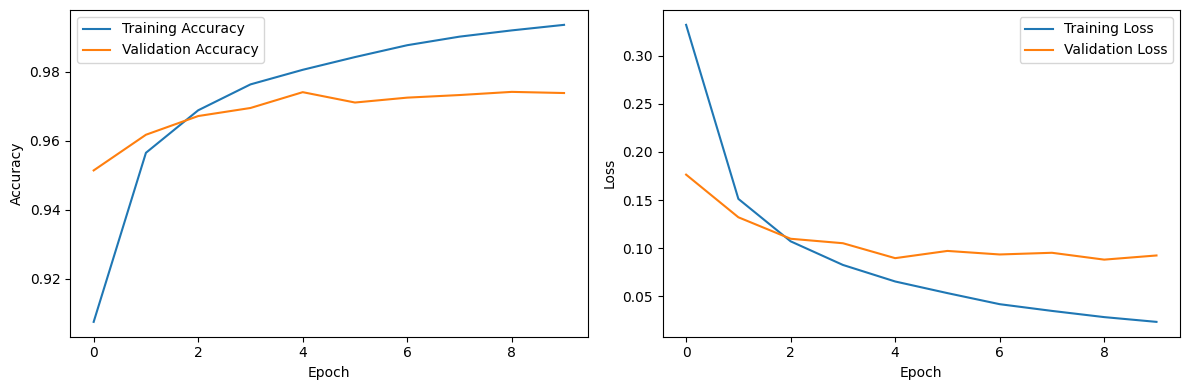

In [24]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


## MNIST Dataset con PyTorch

In [26]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms


c:\Users\icira\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Cargamos el dataset y transformamos los datos a tensores:

In [28]:
# Define data transforms
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Load the MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)

# Create data loaders
batch_size = 64
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


Transformar los datos a tensores es necesario para poder usarlos con PyTorch. Además, dado que los datos están en formato numpy, es necesario convertirlos a tensores de tipo float32, ya que por defecto los tensores de PyTorch son de tipo float64.

Definimos el modelo:

In [29]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = Net()


Definimos la función de coste y el optimizador:

In [30]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


Entrenamos el modelo:

In [31]:
num_epochs = 10
running_losses = []

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()  # Zero the gradients
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Compute the loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update the weights
        running_loss += loss.item()
        
    running_losses.append(running_loss / len(train_loader))

    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss / len(train_loader)}')

print('Training finished')


Epoch 1/10, Loss: 0.3911148924579117
Epoch 2/10, Loss: 0.19934290831785467
Epoch 3/10, Loss: 0.14611011507339092
Epoch 4/10, Loss: 0.11573072904343608
Epoch 5/10, Loss: 0.09637508427611054
Epoch 6/10, Loss: 0.08667279069951332
Epoch 7/10, Loss: 0.07434940813129136
Epoch 8/10, Loss: 0.06927458345338997
Epoch 9/10, Loss: 0.06199350119466637
Epoch 10/10, Loss: 0.056934166691828964
Training finished


Y lo evaluamos con los datos de test:

In [28]:
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Test Accuracy: {accuracy:.2f}%')


Test Accuracy: 97.15%


Visualizamos la curva de la función de coste durante el entrenamiento:

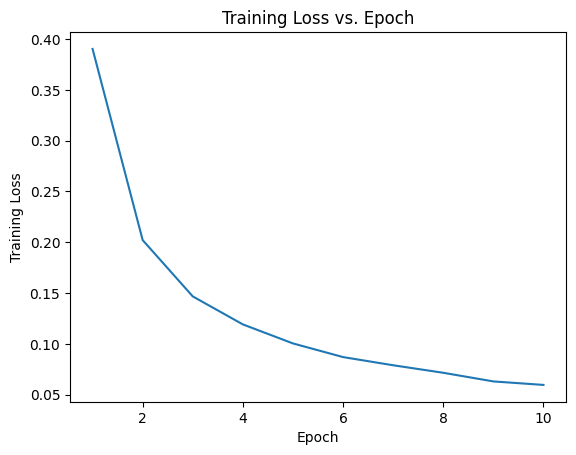

In [29]:
# Plot the training loss
plt.plot(range(1, num_epochs + 1), running_losses)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss vs. Epoch')
plt.show()


# MNIST Dataset con Capas convolucionales

Vamos a resolver el mismo dataset, pero empleando capas convolucionales, que son las que se suelen usar en problemas de visión artificial para el procesamiento de imágenes.

Comenzamos importando los paquetes necesarios, esta vez añadiendo más tipos de capas:

In [32]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

Cargamos los datos y los preprocesamos. Para ello, en esta ocasión, vamos a modificar los datos x haciendo un .reshape() para que tengan la forma de una imagen, y normalizamos los valores de los píxeles dividiendo por 255.

Aunque en los datos originales la forma ya es (28, 28), hacemos un reshape a (-1, 28, 28, 1) para que los datos tengan la forma de una imagen, con 1 canal (escala de grises). Si los datos tuvieran 3 canales (RGB), la forma sería (-1, 28, 28, 3). El primer -1 indica que el tamaño de esa dimensión se calcula automáticamente para que el número total de elementos sea el mismo que en la forma original; y hace referencia a el tamaño del batch.

In [33]:
# Cargar el conjunto de datos MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocesar los datos
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Imprimimos la forma de los datos
print('Shape:', x_train[0].shape)

Shape: (28, 28, 1)


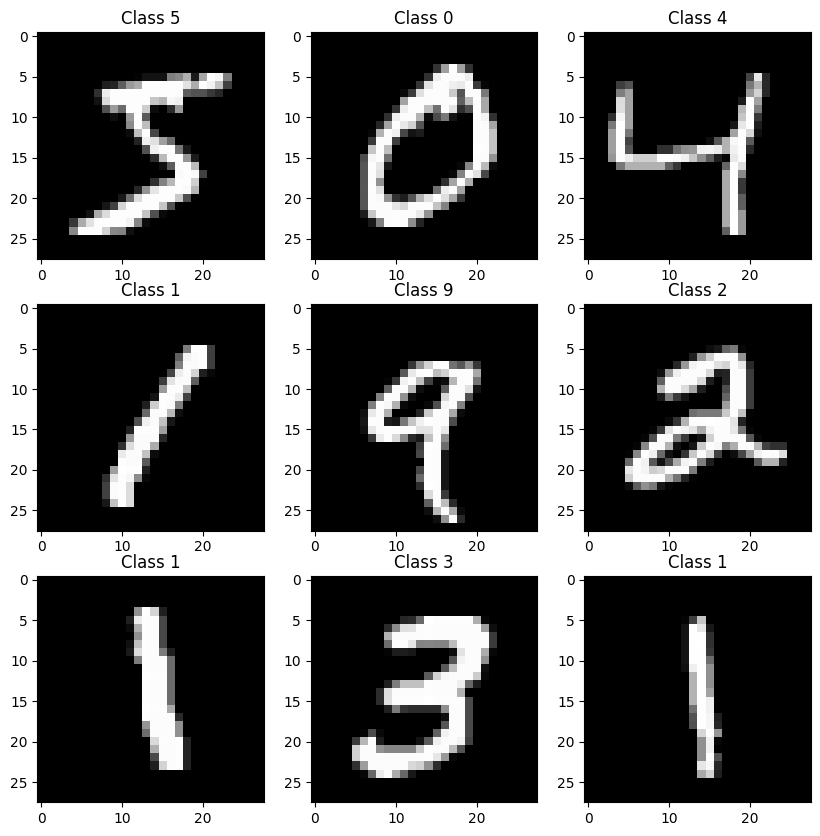

In [34]:
# Visualizamos algunos ejemplos del conjunto de datos
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title('Class {}'.format(y_train[i].argmax()))

Pasamos a crear el modelo:

In [35]:
# Crear el modelo CNN
model = Sequential()

# Capa convolucional 1
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Capa convolucional 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Capa completamente conectada
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Capa de salida
model.add(Dense(10, activation='softmax'))

Al definir el nuevo modelo, hemos seguido la siguiente estructura:
1. Capa convolucional con 32 filtros de tamaño 3x3, con función de activación ReLU. La capa convolucional tiene 32 filtros o kernels, lo que significa que la salida de la capa tendrá 32 canales. El tamaño de salida de cada filtro es 26x26, ya que el tamaño de la imagen es 28x28 y el tamaño del filtro es 3x3. El tamaño de salida de la capa es (None, 26, 26, 32), donde None es el tamaño del batch.
2. Capa MaxPooling2D con tamaño de ventana 2x2. El tamaño de salida de la capa es (None, 13, 13, 32).
3. Capa convolucional con 64 filtros de tamaño 3x3, con función de activación ReLU. El tamaño de salida de cada filtro es 11x11, ya que el tamaño de la imagen es 13x13 y el tamaño del filtro es 3x3. El tamaño de salida de la capa es (None, 11, 11, 64).
4. Capa MaxPooling2D con tamaño de ventana 2x2. El tamaño de salida de la capa es (None, 5, 5, 64).
5. Capa Flatten, que transforma la salida de la capa anterior en un vector de 1600 elementos (5x5x64).
6. Capa Dense con 128 neuronas y función de activación ReLU.
7. Capa de salida con 10 neuronas y función de activación softmax. El tamaño de salida es igual al número de clases, 10 en este caso. La función softmax transforma un vector de números reales en un vector de la misma longitud, donde cada elemento está en el rango [0, 1] y la suma de todos los elementos es 1. El valor de cada elemento representa la probabilidad de que la entrada pertenezca a la clase correspondiente.

Está estructura de capas causará lo siguiente:
- La primera capa convolucional extraerá 32 características de la imagen de entrada.
- La segunda capa MaxPooling2D reducirá el tamaño de la imagen a la mitad, manteniendo las características más importantes.
- La tercera capa convolucional extraerá 64 características de la imagen de entrada.
- La cuarta capa MaxPooling2D reducirá el tamaño de la imagen a la mitad, manteniendo las características más importantes.
- La quinta capa Flatten transformará la salida de la capa anterior en un vector de 1600 elementos.
- La sexta capa Dense con 128 neuronas realizará una transformación lineal de los datos.
- La séptima capa de salida con 10 neuronas realizará una transformación lineal de los datos.




A continuación compilamos el modelo y lo entrenamos:

In [36]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 9s 24ms/step - loss: 0.3298 - accuracy: 0.8995 - val_loss: 0.0752 - val_accuracy: 0.9778
Epoch 2/10
375/375 [==============================] - 9s 24ms/step - loss: 0.1076 - accuracy: 0.9678 - val_loss: 0.0558 - val_accuracy: 0.9839
Epoch 3/10
375/375 [==============================] - 9s 25ms/step - loss: 0.0819 - accuracy: 0.9759 - val_loss: 0.0495 - val_accuracy: 0.9857
Epoch 4/10
375/375 [==============================] - 9s 24ms/step - loss: 0.0675 - accuracy: 0.9801 - val_loss: 0.0461 - val_accuracy: 0.9857
Epoch 5/10
375/375 [==============================] - 10s 27ms/step - loss: 0.0551 - accuracy: 0.9829 - val_loss: 0.0376 - val_accuracy: 0.9898
Epoch 6/10
375/375 [==============================] - 10s 27ms/step - loss: 0.0510 - accuracy: 0.9850 - val_loss: 0.0369 - val_accuracy: 0.9895
Epoch 7/10
375/375 [==============================] - 10s 27ms/step - loss: 0.0427 - accuracy: 0.9866 - val_loss: 0.0379 - val_accuracy: 0.9

Por último evaluamos el modelo con los datos de test:

In [38]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Pérdida en el conjunto de prueba:', score[0])
print('Precisión en el conjunto de prueba:', score[1])

Pérdida en el conjunto de prueba: 0.025429410859942436
Precisión en el conjunto de prueba: 0.9926999807357788


Para concluir, vamos a visualizar como han quedado los filtros o kernels de las dos capas convolucionales:

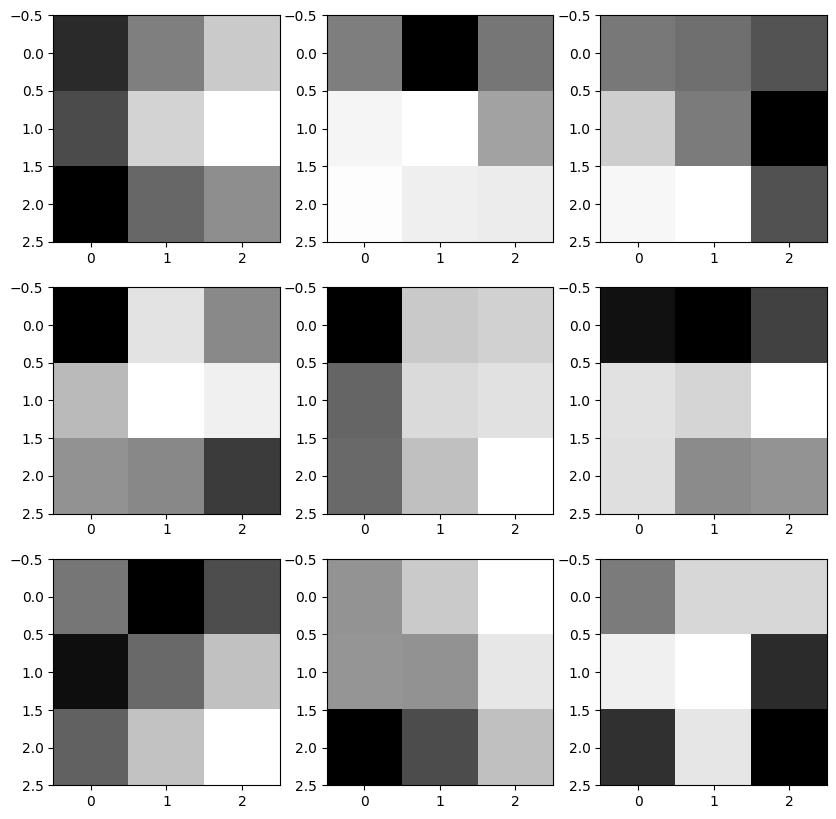

In [38]:
# Visualizamos los filtros de la primera capa convolucional
filters, biases = model.layers[0].get_weights()

# Normalizamos los valores de los filtros para que estén entre 0 y 1
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

# Visualizamos los filtros
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(filters[:, :, 0, i], cmap='gray', interpolation='none')
plt.show()

1/1 [==============================] - 0s 47ms/step


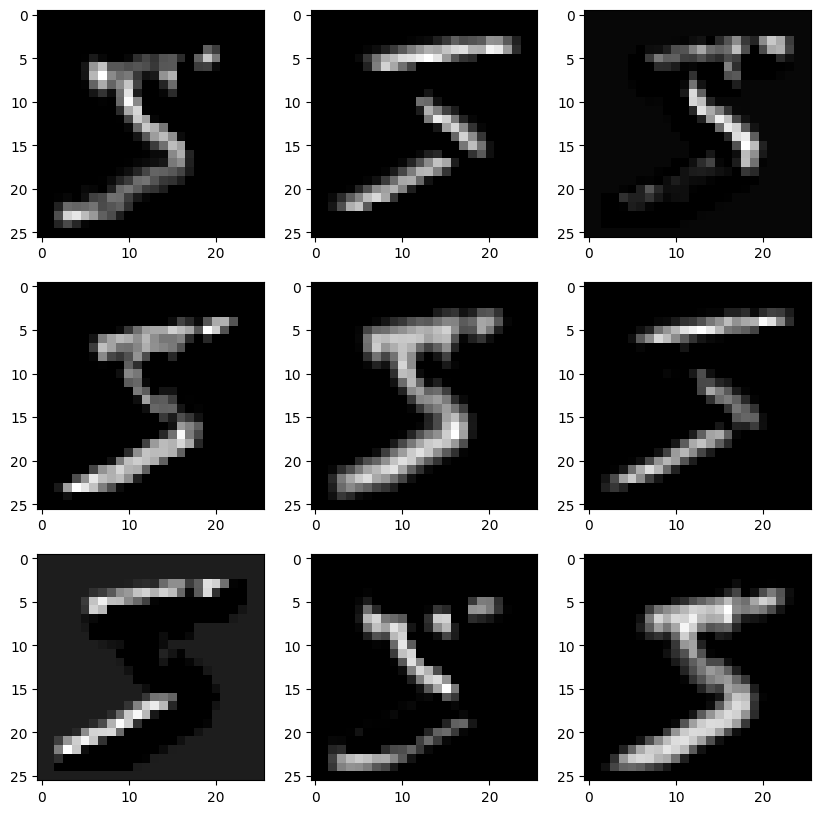

In [39]:
# Visualizamos las salidas de la primera capa convolucional
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers[:4]]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(x_train[0].reshape(1, 28, 28, 1))

# Visualizamos las salidas
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(activations[0][0, :, :, i], cmap='gray', interpolation='none')
plt.show()


1/1 [==============================] - 0s 37ms/step


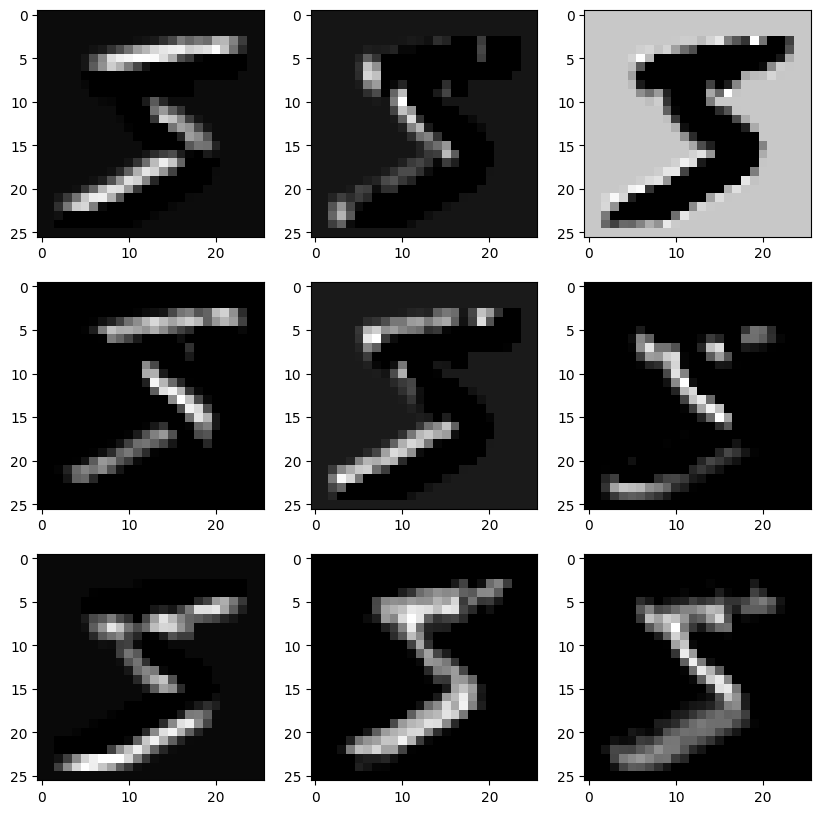

In [41]:
# Visualizamos las salidas de la segunda capa convolucional
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers[:4]]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(x_train[0].reshape(1, 28, 28, 1))

# Visualizamos las salidas
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(activations[0][0, :, :, i], cmap='gray', interpolation='none')
plt.show()